<a href="https://colab.research.google.com/github/sebasruggero/python/blob/main/Intersecciones_con_Geopanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![img](https://www.argentina.gob.ar/sites/default/files/min_transporte.png)
## Intersecciones en Geopanda 
### Lic. Sebastian Ruggero



## Importamos las librerias 

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import os

## Definimos el directorio de las fuentes de datos 


In [ ]:
os.chdir("/home/sebastian/datas_science/renabap") 

## Leemos la data
[Data](https://drive.google.com/file/d/1IthzVbkqJvxHEQFn2A6d3K4n5tlEdd1v/view?usp=sharing)

In [ ]:
### Data de viajes
df = pd.read_csv("data/renabap.csv", sep = ";", encoding="UTF-8")

## Mostramos el encabezado


In [ ]:
df.head(1)

,FECHATRX,DIA,DIASEMANA,HORA,MODO,NROTARJETA,SECUENCIA_,ID_COMBINA,CONTRATO,DESC_TRX,ENTIDAD,LINEA,MUNICIPIO,DESC_RAMAL,ESTACION,ID_SERVICI,DIRECTION,LONGITUDE,LATITUDE
0,20/11/2021 23:59:40,20,Sábado,23,COLE,1838951397,113,NaN,627 - NO REGISTRADOS,Uso,LA NUEVA METROPOL S.A.,LINEA 365,PROV,365R6,NaN,2415,0,-58.80237,-34.54181


## Importamos el shape que vamos a utilizar 

In [ ]:
shape_localidades = gpd.read_file("data/loc/Localidades.shp")
shape_localidades.head(1)

,ID,LOCALIDAD_,NOMBPARTID,COD_PAR,PARTIDO_1,CANT_LOC,CARPETA,RUTA,ARCHIVO,FORMATO,SUP,DATA,DIAGNOSTIC,geometry
0,97,VIRREY DEL PINO,GBA,427.0,LA MATANZA,12.0,0,0,None,None,175.5,None,None,"POLYGON ((10155002.772 -4116032.095, 10155313...."


In [ ]:
## Filtramos la localidad
shape_filtrado = shape_localidades.loc[shape_localidades["LOCALIDAD_"] == "RINCON"] 

## Reseteamos el indice
shape_filtrado.reset_index(drop=True, inplace=True)

## Pasamos el sistema a 4326
shape_filtrado = shape_filtrado.to_crs(epsg= 4326)

## Print encabezado
shape_filtrado.head()

,ID,LOCALIDAD_,NOMBPARTID,COD_PAR,PARTIDO_1,CANT_LOC,CARPETA,RUTA,ARCHIVO,FORMATO,SUP,DATA,DIAGNOSTIC,geometry
0,192,RINCON,GBA,805.0,TIGRE,7.0,0,0,None,None,26.8,None,None,"POLYGON ((-58.64156 -34.38114, -58.63944 -34.3..."


## Creamos el Geo Data Frame de la Base

In [ ]:
### Armamos los puntos del dataframe original
df['geometry'] = df.apply(lambda x: Point(float(x.LONGITUDE), float(x.LATITUDE)), axis=1)

## Print encabezado
df.head(1)

/home/sebastian/anaconda3/envs/python-gis/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,FECHATRX,DIA,DIASEMANA,HORA,MODO,NROTARJETA,SECUENCIA_,ID_COMBINA,CONTRATO,DESC_TRX,ENTIDAD,LINEA,MUNICIPIO,DESC_RAMAL,ESTACION,ID_SERVICI,DIRECTION,LONGITUDE,LATITUDE,geometry
0,20/11/2021 23:59:40,20,Sábado,23,COLE,1838951397,113,NaN,627 - NO REGISTRADOS,Uso,LA NUEVA METROPOL S.A.,LINEA 365,PROV,365R6,NaN,2415,0,-58.80237,-34.54181,POINT (-58.80237 -34.54181)


In [ ]:
## Creamos el geodataframe y tomamos el sistema de coordenadas del shape
df_gdf = gpd.GeoDataFrame(df, crs = shape_filtrado.crs, geometry = df.geometry)

## Chequeamos que el sistema de coordenadas sea el mismo en ambos Geodata Frame

In [ ]:
## Corroboramos el CRS de el shape importado
shape_filtrado.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Graficamos el poligono y los puntos de los geodataframe\

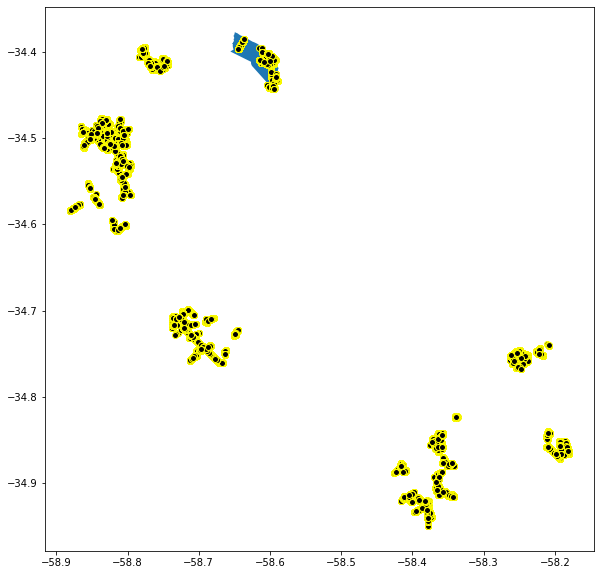

In [ ]:
shape_filtrado.plot( legend=True , figsize=(20,10))
plt.scatter(x=df_gdf.LONGITUDE, y=df_gdf.LATITUDE, c='black', edgecolor = 'yellow')

## Intersección

In [ ]:
#import shapely.speedups
from shapely import speedups
speedups.enabled

# If false, run this line:
#shapely.speedups.enable()

True

In [ ]:
interseccion = df_gdf.within(shape_filtrado.at[0, 'geometry'])
print(interseccion)

0         False
1         False
2         False
3         False
4         False
          ...  
967648     True
967649    False
967650    False
967651    False
967652    False
Length: 967653, dtype: bool


In [ ]:
interseccion = df_gdf.loc[interseccion]
interseccion.head(1)

,FECHATRX,DIA,DIASEMANA,HORA,MODO,NROTARJETA,SECUENCIA_,ID_COMBINA,CONTRATO,DESC_TRX,ENTIDAD,LINEA,MUNICIPIO,DESC_RAMAL,ESTACION,ID_SERVICI,DIRECTION,LONGITUDE,LATITUDE,geometry
5,20/11/2021 23:59:14,20,Sábado,23,COLE,1806655137,469,NaN,627 - NO REGISTRADOS,Uso,MICRO OMNIBUS NORTE S.A.,LINEA 60,JN,C,NaN,1651,0,-58.60791,-34.41233,POINT (-58.60791 -34.41233)


## Graficamos para comprobar visualmente que el proceso esta bien realizado


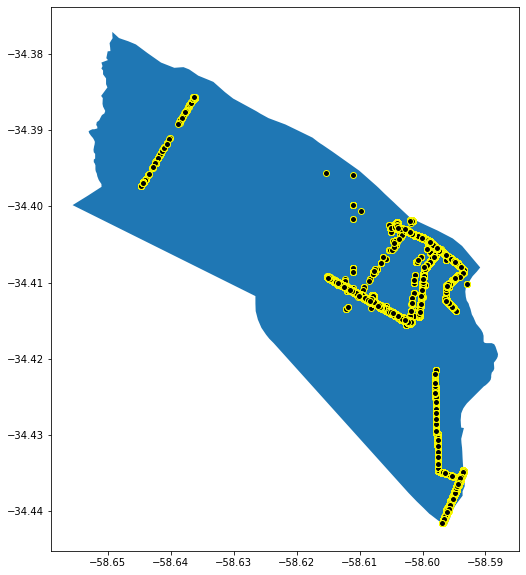

In [ ]:
shape_filtrado.plot( legend=True , figsize=(20,10))
plt.scatter(x=df_limpia.LONGITUDE, y=df_limpia.LATITUDE, c='black', edgecolor = 'yellow')

## Guardamos el dataframe

In [ ]:
interseccion.to_csv("interseccion.csv")
